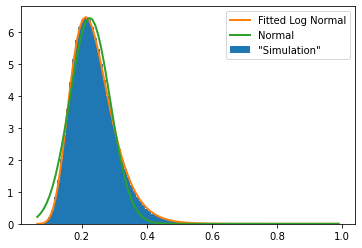

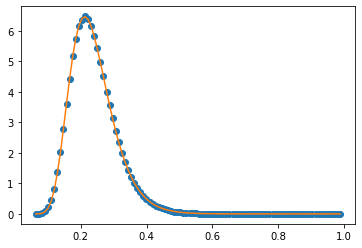

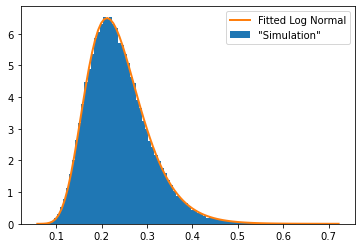

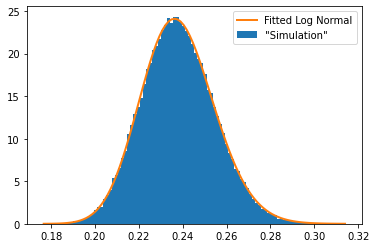

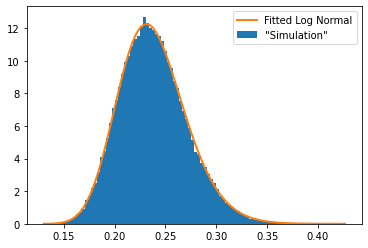

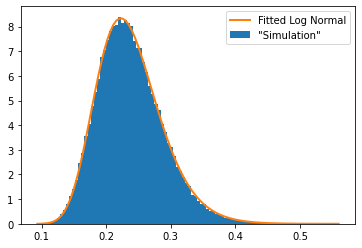

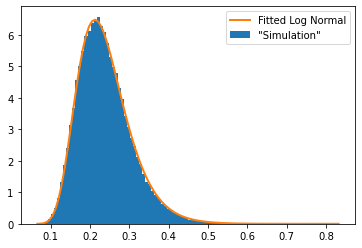

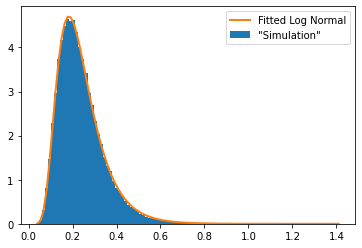

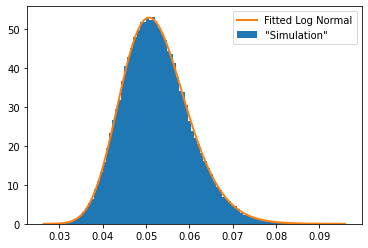

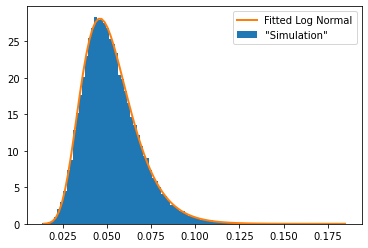

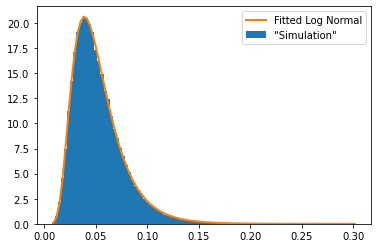

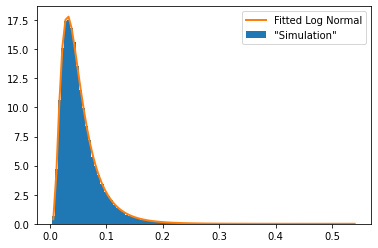

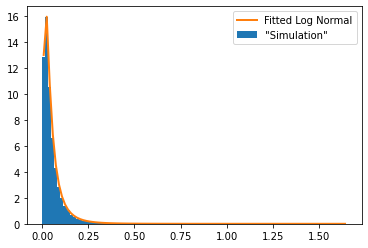

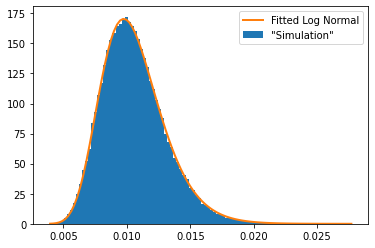

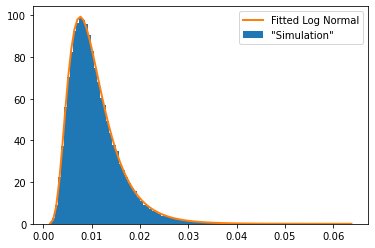

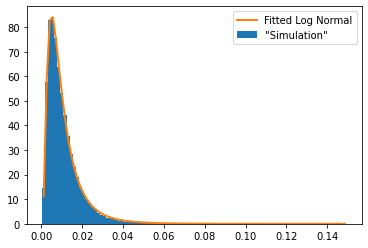

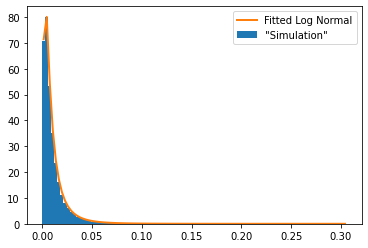

<ipython-input-2-0dade02fae3f>:45: RuntimeWarning: invalid value encountered in log
  mu = sum(np.log(data))/nSimulations
<ipython-input-2-0dade02fae3f>:46: RuntimeWarning: invalid value encountered in log
  s2 = sum((np.log(data)-mu)**2)/nSimulations


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

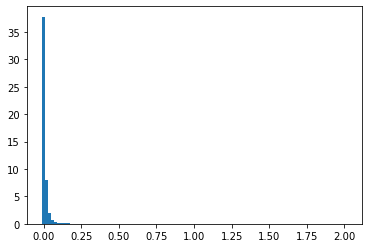

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 21 01:31:18 2021

@author: gladysvelezcaicedo
"""

import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from scipy.optimize import curve_fit

def LogNorm(x,mean,sigma):
    return np.exp(-(np.log(x)-mean)**2/2/sigma**2)/x/sigma/np.sqrt(2*np.pi)

def Norm(x,mean,sigma):
    return np.exp(-(x-mean)**2/2/sigma**2)/sigma/np.sqrt(2*np.pi)


def NormalProducts(mean,std,years,nSimulations):
    #Create a random normal variable
    a = norm(loc=mean,scale=std)
    #Create a distribution with this many elements: nSimulations
    dist = a.rvs(nSimulations)
    #Multiply the random variable every year
    for i in range(years-1):
        dist = dist*a.rvs(nSimulations)
    #Return the distribution for the final year
    return dist

def LogNormalParameters(mean,std,years,nSimulations, plot=False, nbins = 100):
    #create the distribution
    data = NormalProducts(mean,std,years,nSimulations)
    #Start plotting
    if plot:
        plt.figure()
    #Make the histogram
    count, bins, ignored = plt.hist(data, nbins, density=True, align='mid',label = '"Simulation"')
    #Get data to fit from histogram
    xForFit = bins[:-1]+(bins[1]-bins[0])/2
    yForFit = count
    
    #Fitting
    #Estimate fitting parameters
    mu = sum(np.log(data))/nSimulations
    s2 = sum((np.log(data)-mu)**2)/nSimulations
    guess = [mu,np.sqrt(s2)]
    #Do the fit
    popt, success = curve_fit(LogNorm,xForFit,yForFit,guess)
    #Plot the fit
    if plot:
        plt.plot(xForFit,LogNorm(xForFit,*popt),label='Fitted Log Normal',linewidth=2)
        plt.legend()
        plt.pause(0.01)
        plt.show()
    
    #return the distribution, and fitting parameters, and covariance matrix
    return data, popt, success

#%%
"""
Single example
"""
#Define the parameters
mean = 1-0.05 # mean
std = 0.05 # standard deviation
years = 28 # number of years
nSimulations = 1000000 # samples for the distribution
nBins = 100 # bins for the histogram

# Make the histogram
data = NormalProducts(mean,std,years,nSimulations)

# Estimate the log-normal distribution
mu = sum(np.log(data))/len(data)
s2 = sum((np.log(data)-mu)**2)/len(data)
guess = [mu,np.sqrt(s2)]

#Plot the histogram and get the histogram data
plt.figure()
count, bins, ignored = plt.hist(data, nBins, density=True, align='mid',label = '"Simulation"')
#plt.plot(bins[:-1]+(bins[1]-bins[0])/2,count)

# data from histogram
xForFit = bins[:-1]+(bins[1]-bins[0])/2
yForFit = count
#do the fit
popt, success = curve_fit(LogNorm,xForFit,yForFit,guess)
plt.plot(xForFit,LogNorm(xForFit,*popt),label='Fitted Log Normal',linewidth=2)

popt2, success2 = curve_fit(Norm,xForFit,yForFit)
plt.plot(xForFit,Norm(xForFit,*popt2),label='Normal',linewidth=2)
plt.legend()

##%%
plt.figure()
plt.plot(xForFit,yForFit,'o')
plt.plot(xForFit,LogNorm(xForFit,*popt))
#%%
"""
Test of single example with compact function
"""
data, popt, success = LogNormalParameters(0.95,0.05,28,100000, plot=True, nbins = 100)

#%%
"""
Creating an array with the fitting parameters of the log-normal distribution
"""
years = 28
nSimulations = 100000

means = np.array([5,10,15,20,25,30,35,40,45,50]) # In %
means = 1 - means/100 #Convert it into regular number

CVs = np.array([0.25, 0.5, 0.75, 1, 1.5])

ParameterArray = np.zeros((len(means),len(CVs),2))

for i, mean_temp in enumerate(means):
    for j, CV_temp in enumerate(CVs):
        ParameterArray[i,j] = LogNormalParameters(mean_temp,CV_temp*(1-mean_temp),years,nSimulations, plot=True, nbins = 100)[1]

#%%

# Accessing the fitting parameters for a given combination
ParameterArray[2,1]




